In [122]:
import pandas as pd 
url = 'https://chronicdata.cdc.gov/resource/vba9-s8jp.csv'
df = pd.read_csv(url)
df

,yearstart,yearend,locationabbr,locationdesc,datasource,class,topic,question,data_value_unit,data_value_type,data_value,data_value_alt,data_value_footnote_symbol,data_value_footnote,low_confidence_limit,high_confidence_limit,sample_size,total,gender,grade,race_ethnicity,geolocation,classid,topicid,questionid,datavaluetypeid,locationid,stratificationcategory1,stratification1,stratificationcategoryid1,stratificationid1
0,2019,2019,AL,Alabama,Youth Risk Behavior Surveillance System,Sugar Drinks,Sugar Drinks - Behavior,Percent of students in grades 9-12 who drank r...,NaN,Value,30.8,30.8,NaN,NaN,21.7,41.8,145.0,NaN,NaN,NaN,Hispanic,"\n, \n(32.840571122, -86.631860762)",SD,SD1,Q058,VALUE,1,Race/Ethnicity,Hispanic,RACE,RACEHIS
1,2019,2019,ID,Idaho,Youth Risk Behavior Surveillance System,Sugar Drinks,Sugar Drinks - Behavior,Percent of students in grades 9-12 who drank r...,NaN,Value,13.0,13.0,NaN,NaN,9.0,18.4,240.0,NaN,NaN,NaN,Hispanic,"\n, \n(43.682630005, -114.363730042)",SD,SD1,Q058,VALUE,16,Race/Ethnicity,Hispanic,RACE,RACEHIS
2,2019,2019,IA,Iowa,Youth Risk Behavior Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of students in grades 9-12 who have ob...,NaN,Value,22.3,22.3,NaN,NaN,15.3,31.4,343.0,NaN,NaN,11th,NaN,"\n, \n(42.469400913, -93.816490556)",OWS,OWS1,Q038,VALUE,19,Grade,11th,GRADE,GRADE11
3,2019,2019,LA,Louisiana,Youth Risk Behavior Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of students in grades 9-12 who have ob...,NaN,Value,13.6,13.6,NaN,NaN,10.4,17.6,610.0,NaN,Female,NaN,NaN,"\n, \n(31.312660644, -92.445680071)",OWS,OWS1,Q038,VALUE,22,Gender,Female,GEN,FEMALE
4,2019,2019,ME,Maine,Youth Risk Behavior Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of students in grades 9-12 who have an...,NaN,Value,17.4,17.4,NaN,NaN,14.7,20.5,387.0,NaN,NaN,NaN,Hispanic,"\n, \n(45.254228894001, -68.985031336)",OWS,OWS1,Q039,VALUE,23,Race/Ethnicity,Hispanic,RACE,RACEHIS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2019,2019,AR,Arkansas,Youth Risk Behavior Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of students in grades 9-12 who have an...,NaN,Value,18.7,18.7,NaN,NaN,15.2,22.8,511.0,NaN,NaN,11th,NaN,"\n, \n(34.748650124, -92.274490743)",OWS,OWS1,Q039,VALUE,5,Grade,11th,GRADE,GRADE11
996,2019,2019,FL,Florida,Youth Risk Behavior Surveillance System,Sugar Drinks,Sugar Drinks - Behavior,Percent of students in grades 9-12 who drank r...,NaN,Value,17.1,17.1,NaN,NaN,14.0,20.7,1021.0,NaN,NaN,12th,NaN,"\n, \n(28.932040377, -81.928960539)",SD,SD1,Q058,VALUE,12,Grade,12th,GRADE,GRADE12
997,2005,2005,US,National,Youth Risk Behavior Surveillance System,Television Viewing,Television Viewing - Behavior,Percent of students in grades 9-12 watching 3 ...,NaN,Value,29.2,29.2,NaN,NaN,24.8,33.9,363.0,NaN,NaN,NaN,Asian,NaN,TV,TV1,Q059,VALUE,59,Race/Ethnicity,Asian,RACE,RACEASN
998,2007,2007,MA,Massachusetts,Youth Risk Behavior Surveillance System,Sugar Drinks,Sugar Drinks - Behavior,Percent of students in grades 9-12 who drank r...,NaN,Value,24.5,24.5,NaN,NaN,21.4,27.9,2036.0,NaN,NaN,NaN,Non-Hispanic White,"\n, \n(42.27687047, -72.082690675)",SD,SD1,Q058,VALUE,25,Race/Ethnicity,Non-Hispanic White,RACE,RACEWHT


##Potential Indepedent and Dependent Variables 

In [123]:
for col in df.columns: 
  print(col)

yearstart
yearend
locationabbr
locationdesc
datasource
class
topic
question
data_value_unit
data_value_type
data_value
data_value_alt
data_value_footnote_symbol
data_value_footnote
low_confidence_limit
high_confidence_limit
sample_size
total
gender
grade
race_ethnicity
geolocation
classid
topicid
questionid
datavaluetypeid
locationid
stratificationcategory1
stratification1
stratificationcategoryid1
stratificationid1


##Missing Data 

In [124]:
df.isnull()
##Identified null values 

,yearstart,yearend,locationabbr,locationdesc,datasource,class,topic,question,data_value_unit,data_value_type,data_value,data_value_alt,data_value_footnote_symbol,data_value_footnote,low_confidence_limit,high_confidence_limit,sample_size,total,gender,grade,race_ethnicity,geolocation,classid,topicid,questionid,datavaluetypeid,locationid,stratificationcategory1,stratification1,stratificationcategoryid1,stratificationid1
0,False,False,False,False,False,False,False,False,True,False,False,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False,False,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True,False,False,False,True,True,False,False,False,True,True,False,True,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False,False,False,True,True,False,False,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True,False,False,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,True,False,False,False,True,True,False,False,False,True,True,False,True,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,True,False,False,False,True,True,False,False,False,True,True,False,True,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,True,False,False,False,True,True,False,False,False,True,True,True,False,True,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,True,False,False,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False


In [125]:
df['locationabbr'].isnull().value_counts()

False    1000
Name: locationabbr, dtype: int64

In [126]:
df.isnull().sum()
##Identified total null values 

yearstart                        0
yearend                          0
locationabbr                     0
locationdesc                     0
datasource                       0
class                            0
topic                            0
question                         0
data_value_unit               1000
data_value_type                  0
data_value                     197
data_value_alt                 197
data_value_footnote_symbol     803
data_value_footnote            803
low_confidence_limit           197
high_confidence_limit          197
sample_size                    197
total                          913
gender                         827
grade                          678
race_ethnicity                 582
geolocation                     60
classid                          0
topicid                          0
questionid                       0
datavaluetypeid                  0
locationid                       0
stratificationcategory1          0
stratification1     

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   yearstart                   1000 non-null   int64  
 1   yearend                     1000 non-null   int64  
 2   locationabbr                1000 non-null   object 
 3   locationdesc                1000 non-null   object 
 4   datasource                  1000 non-null   object 
 5   class                       1000 non-null   object 
 6   topic                       1000 non-null   object 
 7   question                    1000 non-null   object 
 8   data_value_unit             0 non-null      float64
 9   data_value_type             1000 non-null   object 
 10  data_value                  803 non-null    float64
 11  data_value_alt              803 non-null    float64
 12  data_value_footnote_symbol  197 non-null    object 
 13  data_value_footnote         197 no

In [128]:
df['locationid'] = df['locationid'].astype(str)
##locationid was recognized as int64; replaced as str 

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   yearstart                   1000 non-null   int64  
 1   yearend                     1000 non-null   int64  
 2   locationabbr                1000 non-null   object 
 3   locationdesc                1000 non-null   object 
 4   datasource                  1000 non-null   object 
 5   class                       1000 non-null   object 
 6   topic                       1000 non-null   object 
 7   question                    1000 non-null   object 
 8   data_value_unit             0 non-null      float64
 9   data_value_type             1000 non-null   object 
 10  data_value                  803 non-null    float64
 11  data_value_alt              803 non-null    float64
 12  data_value_footnote_symbol  197 non-null    object 
 13  data_value_footnote         197 no

In [130]:
df.drop(['data_value_unit'], axis = 1, inplace = True)
##Cleaning and dropping unneccessary columns for df 

In [131]:
df.drop(['data_value_footnote_symbol'], axis = 1, inplace = True)

In [132]:
df.drop(['data_value_footnote'], axis = 1, inplace = True)

In [133]:
df.drop(['data_value_alt', 'topic'], axis = 1, inplace = True)

In [134]:
df.drop(['stratificationid1', 'datavaluetypeid', 'stratificationcategoryid1'], axis = 1, inplace = True)

In [135]:
df.drop(df.index[df['locationabbr'] == 'US'], inplace = True)
##Dataset included US. Removed to prevent confusion with values collected from the 50 states 

In [136]:
df.dropna
##Dropped NaN values 

<bound method DataFrame.dropna of      yearstart  yearend  ... stratificationcategory1     stratification1
0         2019     2019  ...          Race/Ethnicity            Hispanic
1         2019     2019  ...          Race/Ethnicity            Hispanic
2         2019     2019  ...                   Grade                11th
3         2019     2019  ...                  Gender              Female
4         2019     2019  ...          Race/Ethnicity            Hispanic
..         ...      ...  ...                     ...                 ...
993       2011     2011  ...          Race/Ethnicity     2 or more races
995       2019     2019  ...                   Grade                11th
996       2019     2019  ...                   Grade                12th
998       2007     2007  ...          Race/Ethnicity  Non-Hispanic White
999       2017     2017  ...                   Grade                10th

[940 rows x 23 columns]>

In [137]:
df
##Cleaned dataframe 

,yearstart,yearend,locationabbr,locationdesc,datasource,class,question,data_value_type,data_value,low_confidence_limit,high_confidence_limit,sample_size,total,gender,grade,race_ethnicity,geolocation,classid,topicid,questionid,locationid,stratificationcategory1,stratification1
0,2019,2019,AL,Alabama,Youth Risk Behavior Surveillance System,Sugar Drinks,Percent of students in grades 9-12 who drank r...,Value,30.8,21.7,41.8,145.0,NaN,NaN,NaN,Hispanic,"\n, \n(32.840571122, -86.631860762)",SD,SD1,Q058,1,Race/Ethnicity,Hispanic
1,2019,2019,ID,Idaho,Youth Risk Behavior Surveillance System,Sugar Drinks,Percent of students in grades 9-12 who drank r...,Value,13.0,9.0,18.4,240.0,NaN,NaN,NaN,Hispanic,"\n, \n(43.682630005, -114.363730042)",SD,SD1,Q058,16,Race/Ethnicity,Hispanic
2,2019,2019,IA,Iowa,Youth Risk Behavior Surveillance System,Obesity / Weight Status,Percent of students in grades 9-12 who have ob...,Value,22.3,15.3,31.4,343.0,NaN,NaN,11th,NaN,"\n, \n(42.469400913, -93.816490556)",OWS,OWS1,Q038,19,Grade,11th
3,2019,2019,LA,Louisiana,Youth Risk Behavior Surveillance System,Obesity / Weight Status,Percent of students in grades 9-12 who have ob...,Value,13.6,10.4,17.6,610.0,NaN,Female,NaN,NaN,"\n, \n(31.312660644, -92.445680071)",OWS,OWS1,Q038,22,Gender,Female
4,2019,2019,ME,Maine,Youth Risk Behavior Surveillance System,Obesity / Weight Status,Percent of students in grades 9-12 who have an...,Value,17.4,14.7,20.5,387.0,NaN,NaN,NaN,Hispanic,"\n, \n(45.254228894001, -68.985031336)",OWS,OWS1,Q039,23,Race/Ethnicity,Hispanic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,2011,2011,NY,New York,Youth Risk Behavior Surveillance System,Physical Activity,Percent of students in grades 9-12 who partici...,Value,25.1,19.4,31.9,355.0,NaN,NaN,NaN,2 or more races,"\n, \n(42.827001032, -75.543970427)",PA,PA1,Q049,36,Race/Ethnicity,2 or more races
995,2019,2019,AR,Arkansas,Youth Risk Behavior Surveillance System,Obesity / Weight Status,Percent of students in grades 9-12 who have an...,Value,18.7,15.2,22.8,511.0,NaN,NaN,11th,NaN,"\n, \n(34.748650124, -92.274490743)",OWS,OWS1,Q039,5,Grade,11th
996,2019,2019,FL,Florida,Youth Risk Behavior Surveillance System,Sugar Drinks,Percent of students in grades 9-12 who drank r...,Value,17.1,14.0,20.7,1021.0,NaN,NaN,12th,NaN,"\n, \n(28.932040377, -81.928960539)",SD,SD1,Q058,12,Grade,12th
998,2007,2007,MA,Massachusetts,Youth Risk Behavior Surveillance System,Sugar Drinks,Percent of students in grades 9-12 who drank r...,Value,24.5,21.4,27.9,2036.0,NaN,NaN,NaN,Non-Hispanic White,"\n, \n(42.27687047, -72.082690675)",SD,SD1,Q058,25,Race/Ethnicity,Non-Hispanic White


In [138]:
df.describe()
##Summary of all the data within original dataframe limited to the 50 states 

,yearstart,yearend,data_value,low_confidence_limit,high_confidence_limit,sample_size
count,940.000000,940.000000,743.000000,743.000000,743.000000,743.000000
mean,2013.440426,2013.440426,24.754643,20.477793,29.797981,1248.492598
std,5.518645,5.518645,12.830333,11.928728,13.912782,2589.405270
min,2001.000000,2001.000000,4.300000,1.800000,7.500000,100.000000
25%,2009.000000,2009.000000,14.750000,11.500000,18.300000,391.000000
50%,2015.000000,2015.000000,20.300000,15.500000,25.900000,717.000000
75%,2019.000000,2019.000000,33.850000,28.200000,40.650000,1336.000000
max,2019.000000,2019.000000,70.300000,59.500000,80.200000,52025.000000


In [139]:
pd.pivot_table(df, values = ['data_value'], index = ['class'], columns = ['locationabbr'], aggfunc= 'mean')
##Summarized each of the classes identified within this dataset. Columns represented each state and the values for each behavior

data_value          ...                      
locationabbr                    AK      AL  ...         WV         WY
class                                       ...                      
Fruits and Vegetables    40.100000  48.375  ...  46.400000  30.450000
Obesity / Weight Status  15.280000  16.000  ...  15.000000   9.650000
Physical Activity        16.433333  39.000  ...  37.866667  27.566667
Sugar Drinks             20.700000  30.800  ...  33.400000  26.000000
Television Viewing       21.300000  41.200  ...  70.300000  24.700000

[5 rows x 50 columns]

##**Transformations and Visualizations**

In [140]:
state_interest_1 = df[(df['locationabbr'] == 'FL') & 
                      (df['class'] == 'Obesity / Weight Status') & 
                      (df['data_value'] >= 0)]
state_interest_1.sort_values('data_value')
##Filtered dataset to only include Florida and obesity to demonstrate prevalence 

,yearstart,yearend,locationabbr,locationdesc,datasource,class,question,data_value_type,data_value,low_confidence_limit,high_confidence_limit,sample_size,total,gender,grade,race_ethnicity,geolocation,classid,topicid,questionid,locationid,stratificationcategory1,stratification1
426,2003,2003,FL,Florida,Youth Risk Behavior Surveillance System,Obesity / Weight Status,Percent of students in grades 9-12 who have ob...,Value,7.7,6.3,9.4,1818.0,NaN,Female,NaN,NaN,"\n, \n(28.932040377, -81.928960539)",OWS,OWS1,Q038,12,Gender,Female
303,2019,2019,FL,Florida,Youth Risk Behavior Surveillance System,Obesity / Weight Status,Percent of students in grades 9-12 who have ob...,Value,8.7,4.3,16.8,104.0,NaN,NaN,NaN,Asian,"\n, \n(28.932040377, -81.928960539)",OWS,OWS1,Q038,12,Race/Ethnicity,Asian
773,2007,2007,FL,Florida,Youth Risk Behavior Surveillance System,Obesity / Weight Status,Percent of students in grades 9-12 who have an...,Value,9.3,5.0,16.6,105.0,NaN,NaN,NaN,Asian,"\n, \n(28.932040377, -81.928960539)",OWS,OWS1,Q039,12,Race/Ethnicity,Asian
973,2005,2005,FL,Florida,Youth Risk Behavior Surveillance System,Obesity / Weight Status,Percent of students in grades 9-12 who have ob...,Value,10.1,7.5,13.5,665.0,NaN,NaN,12th,NaN,"\n, \n(28.932040377, -81.928960539)",OWS,OWS1,Q038,12,Grade,12th
228,2007,2007,FL,Florida,Youth Risk Behavior Surveillance System,Obesity / Weight Status,Percent of students in grades 9-12 who have an...,Value,13.1,11.6,14.7,1667.0,NaN,NaN,NaN,Non-Hispanic White,"\n, \n(28.932040377, -81.928960539)",OWS,OWS1,Q039,12,Race/Ethnicity,Non-Hispanic White
459,2019,2019,FL,Florida,Youth Risk Behavior Surveillance System,Obesity / Weight Status,Percent of students in grades 9-12 who have ob...,Value,14.7,11.9,17.9,807.0,NaN,NaN,NaN,Non-Hispanic Black,"\n, \n(28.932040377, -81.928960539)",OWS,OWS1,Q038,12,Race/Ethnicity,Non-Hispanic Black
253,2013,2013,FL,Florida,Youth Risk Behavior Surveillance System,Obesity / Weight Status,Percent of students in grades 9-12 who have ob...,Value,14.9,13.4,16.5,2675.0,NaN,Male,NaN,NaN,"\n, \n(28.932040377, -81.928960539)",OWS,OWS1,Q038,12,Gender,Male
859,2003,2003,FL,Florida,Youth Risk Behavior Surveillance System,Obesity / Weight Status,Percent of students in grades 9-12 who have an...,Value,14.9,12.3,17.9,642.0,NaN,NaN,NaN,Non-Hispanic Black,"\n, \n(28.932040377, -81.928960539)",OWS,OWS1,Q039,12,Race/Ethnicity,Non-Hispanic Black
915,2015,2015,FL,Florida,Youth Risk Behavior Surveillance System,Obesity / Weight Status,Percent of students in grades 9-12 who have an...,Value,14.9,13.0,17.1,1046.0,NaN,NaN,NaN,Non-Hispanic Black,"\n, \n(28.932040377, -81.928960539)",OWS,OWS1,Q039,12,Race/Ethnicity,Non-Hispanic Black
933,2015,2015,FL,Florida,Youth Risk Behavior Surveillance System,Obesity / Weight Status,Percent of students in grades 9-12 who have an...,Value,15.9,13.8,18.3,1863.0,NaN,NaN,NaN,Hispanic,"\n, \n(28.932040377, -81.928960539)",OWS,OWS1,Q039,12,Race/Ethnicity,Hispanic


In [141]:
pd.pivot_table(state_interest_1, values = ['data_value'], index = ['race_ethnicity', 'sample_size'], columns = ['yearstart'], aggfunc= 'mean')
##Used the filtered data set and summarized potential variables, which in this case is ethnicity 
##There are a lot of missing values with ethnicity so it will not be used to correlate 

data_value                  
yearstart                            2003  2007  2015  2019
race_ethnicity     sample_size                             
Asian              104.0              NaN   NaN   NaN   8.7
                   105.0              NaN   9.3   NaN   NaN
Hispanic           1863.0             NaN   NaN  15.9   NaN
Non-Hispanic Black 642.0             14.9   NaN   NaN   NaN
                   807.0              NaN   NaN   NaN  14.7
                   1046.0             NaN   NaN  14.9   NaN
Non-Hispanic White 1667.0             NaN  13.1   NaN   NaN

In [142]:
state_interest_1['locationabbr'].value_counts()
##Within filtered dataset, there are 10 counts of Florida and its obesity rates for adolescents 

FL    10
Name: locationabbr, dtype: int64

In [143]:
state_interest_1[['yearstart','class', 'data_value']].sort_values('yearstart')
##Sorted the filtered data set and ordered it by incremental years 

,yearstart,class,data_value
426,2003,Obesity / Weight Status,7.7
859,2003,Obesity / Weight Status,14.9
973,2005,Obesity / Weight Status,10.1
228,2007,Obesity / Weight Status,13.1
773,2007,Obesity / Weight Status,9.3
253,2013,Obesity / Weight Status,14.9
915,2015,Obesity / Weight Status,14.9
933,2015,Obesity / Weight Status,15.9
303,2019,Obesity / Weight Status,8.7
459,2019,Obesity / Weight Status,14.7


In [144]:
state_interest_1.describe()
##Central tendencies of this filtered dataset 

,yearstart,yearend,data_value,low_confidence_limit,high_confidence_limit,sample_size
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,2010.600000,2010.600000,12.420000,9.910000,15.870000,1139.200000
std,6.310485,6.310485,3.117264,3.708983,2.714181,840.253639
min,2003.000000,2003.000000,7.700000,4.300000,9.400000,104.000000
25%,2005.500000,2005.500000,9.500000,6.600000,15.150000,647.750000
50%,2010.000000,2010.000000,13.900000,11.750000,16.700000,926.500000
75%,2015.000000,2015.000000,14.900000,12.825000,17.700000,1780.250000
max,2019.000000,2019.000000,15.900000,13.800000,18.300000,2675.000000


In [145]:
state_interest_1['data_value'].mean()

12.420000000000002

In [146]:
state_interest_1['data_value'].median()

13.899999999999999

In [147]:
state_interest_1['data_value'].mode()

0    14.9
dtype: float64

In [148]:
state_interest_1['data_value'].describe()

count    10.000000
mean     12.420000
std       3.117264
min       7.700000
25%       9.500000
50%      13.900000
75%      14.900000
max      15.900000
Name: data_value, dtype: float64

In [149]:
state_interest_1['data_value'].value_counts()
##Total number of repeated values within the 10 counts of Florida 

14.9    3
10.1    1
14.7    1
13.1    1
7.7     1
9.3     1
8.7     1
15.9    1
Name: data_value, dtype: int64

In [150]:
state_interest_1.groupby(['yearstart'])['data_value'].describe()
##Central tendencies refined to only include the percentages 

,count,mean,std,min,25%,50%,75%,max
yearstart,,,,,,,,
2003,2.0,11.3,5.091169,7.7,9.50,11.3,13.10,14.9
2005,1.0,10.1,NaN,10.1,10.10,10.1,10.10,10.1
2007,2.0,11.2,2.687006,9.3,10.25,11.2,12.15,13.1
2013,1.0,14.9,NaN,14.9,14.90,14.9,14.90,14.9
2015,2.0,15.4,0.707107,14.9,15.15,15.4,15.65,15.9
2019,2.0,11.7,4.242641,8.7,10.20,11.7,13.20,14.7


[Text(0.5, 0, 'Florida Adolescent Obesity Prevalence')]

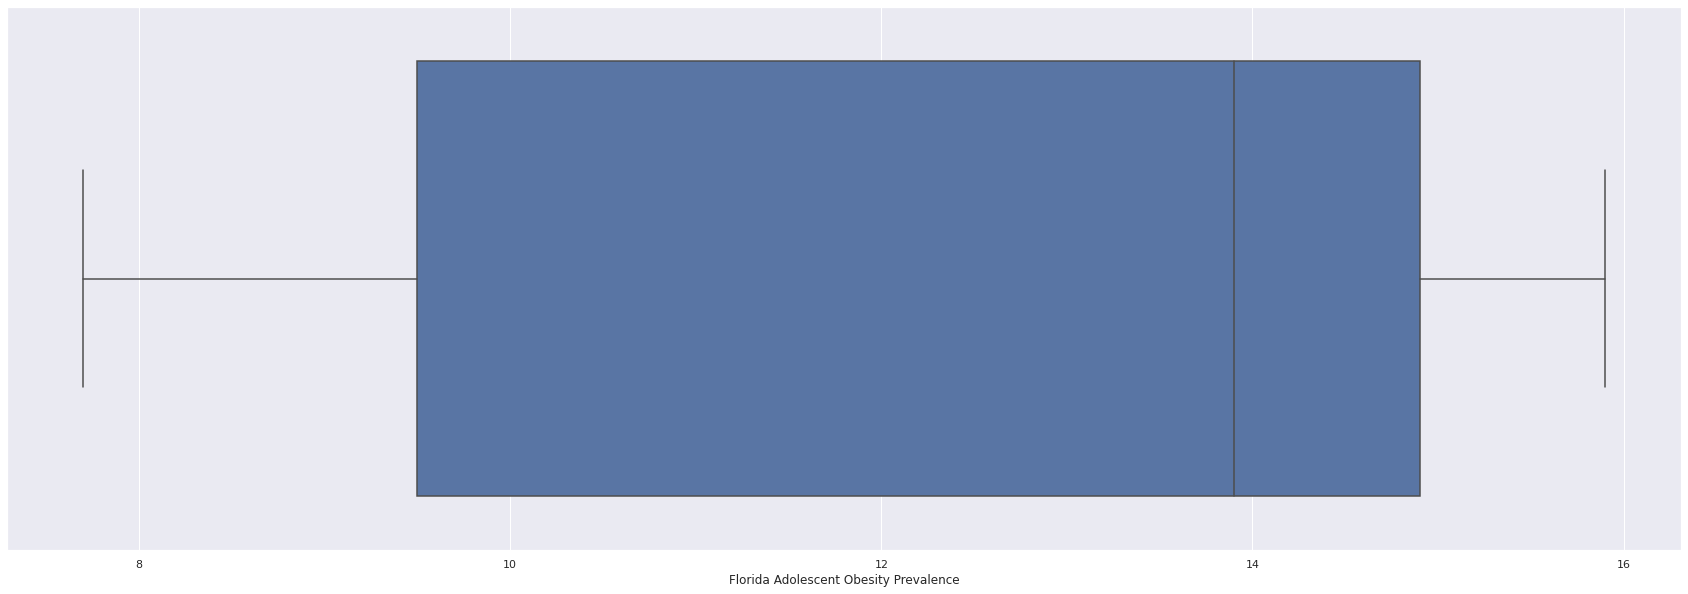

In [151]:
import seaborn as sns
sns.boxplot(x=state_interest_1['data_value']).set(xlabel = 'Florida Adolescent Obesity Prevalence')



[Text(0, 0.5, 'Percentage'),
 Text(0.5, 0, 'Years'),
 Text(0.5, 1.0, 'Florida State Adolescent Obesity Prevalence')]

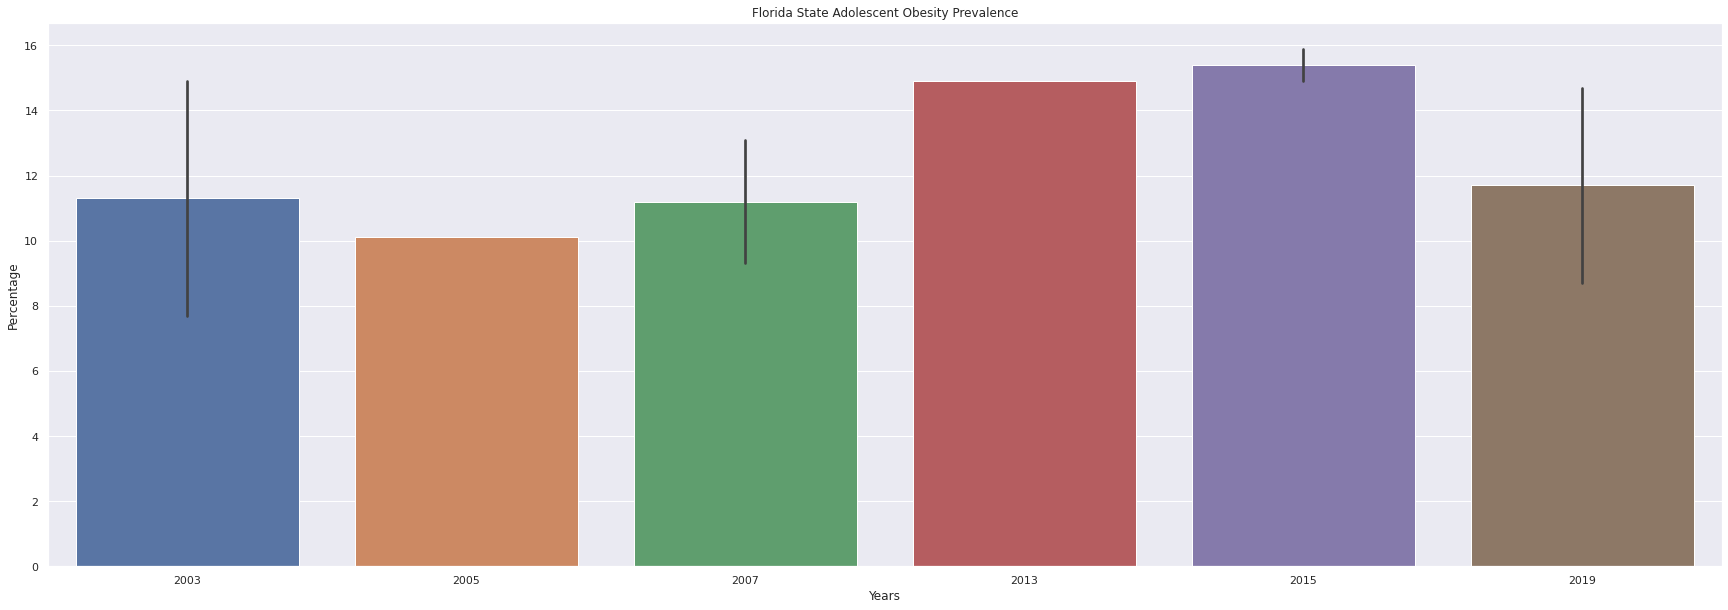

In [152]:
#import seaborn as sns
sns.set(rc = {'figure.figsize':(30,10)})
t = sns.barplot(data = state_interest_1, x = 'yearstart', y = 'data_value')
#t.set_xticklabels(t.get_xticklabels(), rotation = 90)
t.set(xlabel = 'Years', ylabel = 'Percentage', title = 'Florida State Adolescent Obesity Prevalence')

##Used bar graph to demonstrate Florida's adolescent obesity rates over the years 

[Text(0, 0.5, 'Total Percentage'),
 Text(0.5, 0, 'Years'),
 Text(0.5, 1.0, 'Florida State Adolescent Obesity Prevalence')]

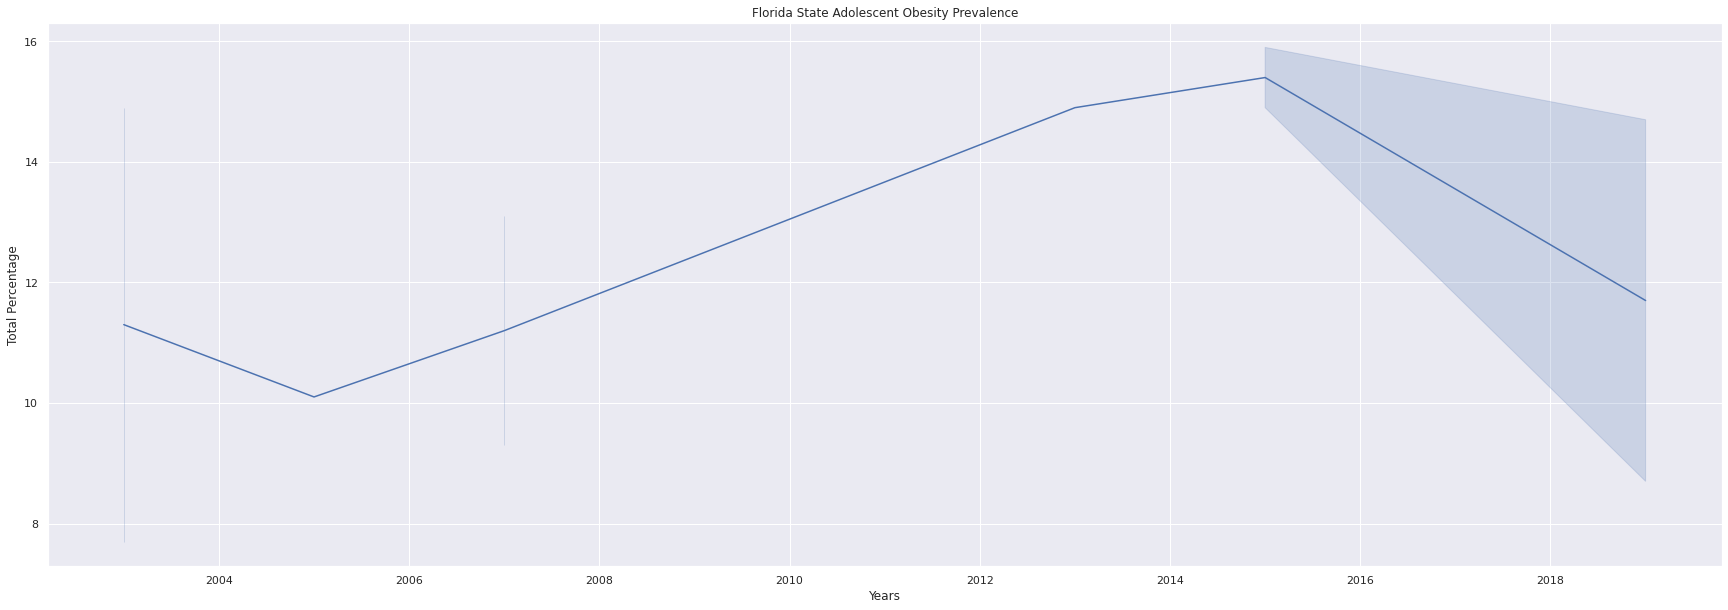

In [153]:
l_florida_obesity = sns.lineplot(data = state_interest_1, x = 'yearstart', y = 'data_value')
l_florida_obesity.set(xlabel = 'Years', ylabel = 'Total Percentage', title = 'Florida State Adolescent Obesity Prevalence')

##Used a line graph to show the same data as above 

In [154]:
state_interest_1['data_value'].skew()
##Standard deviation was calculated. It was in between -1 and 1 so the dataset was normally distributed

-0.4558551880054614

In [155]:
state_interest_2 = df[(df['locationabbr'] == 'FL') & 
                      (df['class'] == 'Sugar Drinks') &
                      (df['data_value'] >= 0)]
state_interest_2.sort_values('data_value')

,yearstart,yearend,locationabbr,locationdesc,datasource,class,question,data_value_type,data_value,low_confidence_limit,high_confidence_limit,sample_size,total,gender,grade,race_ethnicity,geolocation,classid,topicid,questionid,locationid,stratificationcategory1,stratification1
743,2019,2019,FL,Florida,Youth Risk Behavior Surveillance System,Sugar Drinks,Percent of students in grades 9-12 who drank r...,Value,14.8,9.1,23.3,121.0,NaN,NaN,NaN,Asian,"\n, \n(28.932040377, -81.928960539)",SD,SD1,Q058,12,Race/Ethnicity,Asian
996,2019,2019,FL,Florida,Youth Risk Behavior Surveillance System,Sugar Drinks,Percent of students in grades 9-12 who drank r...,Value,17.1,14.0,20.7,1021.0,NaN,NaN,12th,NaN,"\n, \n(28.932040377, -81.928960539)",SD,SD1,Q058,12,Grade,12th
118,2011,2011,FL,Florida,Youth Risk Behavior Surveillance System,Sugar Drinks,Percent of students in grades 9-12 who drank r...,Value,22.6,20.6,24.7,3155.0,NaN,Female,NaN,NaN,"\n, \n(28.932040377, -81.928960539)",SD,SD1,Q058,12,Gender,Female


In [156]:
state_interest_2[['class', 'data_value', 'yearstart']].sort_values('yearstart')

,class,data_value,yearstart
118,Sugar Drinks,22.6,2011
743,Sugar Drinks,14.8,2019
996,Sugar Drinks,17.1,2019


[Text(0, 0.5, 'Total Percentage'),
 Text(0.5, 0, 'Years'),
 Text(0.5, 1.0, 'Florida State Sugary Drink Intake Prevalence')]

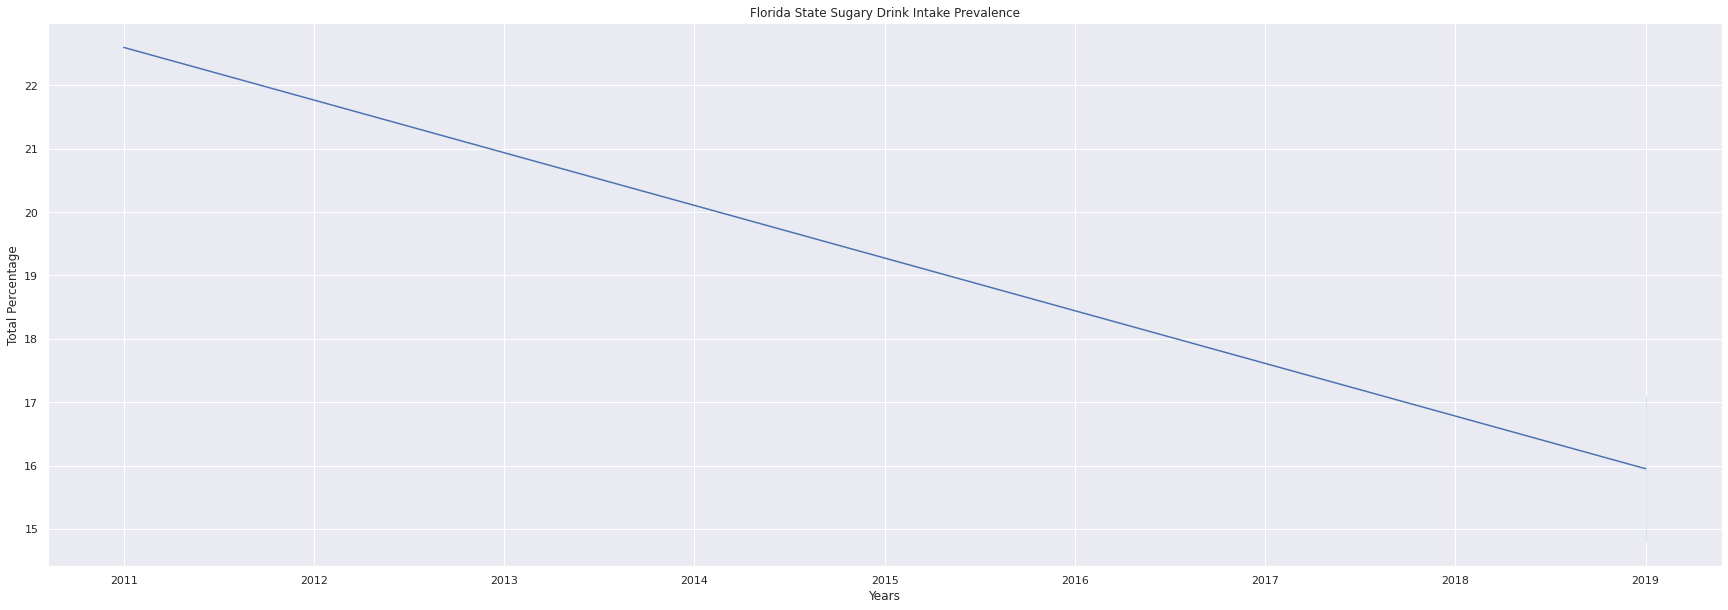

In [157]:
l_florida_sugar = sns.lineplot(data = state_interest_2, x = 'yearstart', y = 'data_value')
l_florida_sugar.set(xlabel = 'Years', ylabel = 'Total Percentage', title = 'Florida State Sugary Drink Intake Prevalence')

In [158]:
state_interest_3 = df[(df['locationabbr'] == 'FL') & 
                      (df['class'] == 'Physical Activity') & 
                      (df['data_value'] >= 0)]
state_interest_3.sort_values('data_value')

,yearstart,yearend,locationabbr,locationdesc,datasource,class,question,data_value_type,data_value,low_confidence_limit,high_confidence_limit,sample_size,total,gender,grade,race_ethnicity,geolocation,classid,topicid,questionid,locationid,stratificationcategory1,stratification1
362,2017,2017,FL,Florida,Youth Risk Behavior Surveillance System,Physical Activity,Percent of students in grades 9-12 who partici...,Value,17.1,14.8,19.8,1460.0,NaN,NaN,11th,NaN,"\n, \n(28.932040377, -81.928960539)",PA,PA1,Q049,12,Grade,11th
960,2019,2019,FL,Florida,Youth Risk Behavior Surveillance System,Physical Activity,Percent of students in grades 9-12 who achieve...,Value,21.7,16.7,27.8,260.0,NaN,NaN,NaN,2 or more races,"\n, \n(28.932040377, -81.928960539)",PA,PA1,Q048,12,Race/Ethnicity,2 or more races
498,2017,2017,FL,Florida,Youth Risk Behavior Surveillance System,Physical Activity,Percent of students in grades 9-12 who achieve...,Value,22.5,20.3,24.9,1646.0,NaN,NaN,10th,NaN,"\n, \n(28.932040377, -81.928960539)",PA,PA1,Q048,12,Grade,10th
652,2015,2015,FL,Florida,Youth Risk Behavior Surveillance System,Physical Activity,Percent of students in grades 9-12 who achieve...,Value,24.1,22.6,25.7,6164.0,Total,NaN,NaN,NaN,"\n, \n(28.932040377, -81.928960539)",PA,PA1,Q048,12,Total,Total
755,2013,2013,FL,Florida,Youth Risk Behavior Surveillance System,Physical Activity,Percent of students in grades 9-12 who partici...,Value,26.9,22.2,32.2,286.0,NaN,NaN,NaN,2 or more races,"\n, \n(28.932040377, -81.928960539)",PA,PA1,Q049,12,Race/Ethnicity,2 or more races
247,2019,2019,FL,Florida,Youth Risk Behavior Surveillance System,Physical Activity,Percent of students in grades 9-12 who achieve...,Value,30.8,28.7,33.1,2557.0,NaN,Male,NaN,NaN,"\n, \n(28.932040377, -81.928960539)",PA,PA1,Q048,12,Gender,Male
657,2017,2017,FL,Florida,Youth Risk Behavior Surveillance System,Physical Activity,Percent of students in grades 9-12 who partici...,Value,33.2,27.4,39.5,1577.0,NaN,NaN,9th,NaN,"\n, \n(28.932040377, -81.928960539)",PA,PA1,Q049,12,Grade,9th


In [159]:
national = df[(df['class'] == 'Obesity / Weight Status') & 
              (df['locationabbr'] != 'FL') &
              (df['data_value'] >= 0)]
national.sort_values('data_value')

,yearstart,yearend,locationabbr,locationdesc,datasource,class,question,data_value_type,data_value,low_confidence_limit,high_confidence_limit,sample_size,total,gender,grade,race_ethnicity,geolocation,classid,topicid,questionid,locationid,stratificationcategory1,stratification1
116,2005,2005,ID,Idaho,Youth Risk Behavior Surveillance System,Obesity / Weight Status,Percent of students in grades 9-12 who have ob...,Value,5.5,3.9,7.5,722.0,NaN,Female,NaN,NaN,"\n, \n(43.682630005, -114.363730042)",OWS,OWS1,Q038,16,Gender,Female
687,2009,2009,SD,South Dakota,Youth Risk Behavior Surveillance System,Obesity / Weight Status,Percent of students in grades 9-12 who have ob...,Value,5.9,4.3,7.9,1047.0,NaN,Female,NaN,NaN,"\n, \n(44.353130053, -100.373530637)",OWS,OWS1,Q038,46,Gender,Female
52,2009,2009,UT,Utah,Youth Risk Behavior Surveillance System,Obesity / Weight Status,Percent of students in grades 9-12 who have ob...,Value,6.3,4.7,8.4,1521.0,Total,NaN,NaN,NaN,"\n, \n(39.360700171, -111.587130635)",OWS,OWS1,Q038,49,Total,Total
792,2001,2001,WY,Wyoming,Youth Risk Behavior Surveillance System,Obesity / Weight Status,Percent of students in grades 9-12 who have ob...,Value,6.5,5.5,7.6,2609.0,Total,NaN,NaN,NaN,"\n, \n(43.235541343, -108.109830353)",OWS,OWS1,Q038,56,Total,Total
156,2011,2011,WY,Wyoming,Youth Risk Behavior Surveillance System,Obesity / Weight Status,Percent of students in grades 9-12 who have ob...,Value,7.0,5.5,8.8,1232.0,NaN,Female,NaN,NaN,"\n, \n(43.235541343, -108.109830353)",OWS,OWS1,Q038,56,Gender,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,2015,2015,PA,Pennsylvania,Youth Risk Behavior Surveillance System,Obesity / Weight Status,Percent of students in grades 9-12 who have ob...,Value,21.7,17.2,27.1,266.0,NaN,NaN,NaN,Non-Hispanic Black,"\n, \n(40.793730152, -77.860700294)",OWS,OWS1,Q038,42,Race/Ethnicity,Non-Hispanic Black
2,2019,2019,IA,Iowa,Youth Risk Behavior Surveillance System,Obesity / Weight Status,Percent of students in grades 9-12 who have ob...,Value,22.3,15.3,31.4,343.0,NaN,NaN,11th,NaN,"\n, \n(42.469400913, -93.816490556)",OWS,OWS1,Q038,19,Grade,11th
470,2019,2019,ND,North Dakota,Youth Risk Behavior Surveillance System,Obesity / Weight Status,Percent of students in grades 9-12 who have an...,Value,27.3,21.3,34.3,114.0,NaN,NaN,NaN,American Indian/Alaska Native,"\n, \n(47.475319779, -100.118421049)",OWS,OWS1,Q039,38,Race/Ethnicity,American Indian/Alaska Native
8,2019,2019,MS,Mississippi,Youth Risk Behavior Surveillance System,Obesity / Weight Status,Percent of students in grades 9-12 who have ob...,Value,28.9,20.5,39.2,129.0,NaN,NaN,NaN,Hispanic,"\n, \n(32.745510099, -89.538030825)",OWS,OWS1,Q038,28,Race/Ethnicity,Hispanic


In [160]:
pd.pivot_table(national, values = ['data_value'], index = ['class'], columns = ['locationabbr'], aggfunc= 'mean')
##Summarized national obesity rates across all 50 states excluding Florida since it was shown above 
##Will be used to compare Florida to the rest of the 49 states 

data_value               ...                       
locationabbr                    AK    AL     AR  ...         WI    WV    WY
class                                            ...                       
Obesity / Weight Status      15.28  16.0  17.34  ...  12.283333  15.0  9.65

[1 rows x 49 columns]

In [161]:
national['data_value'].value_counts()

16.4    7
15.0    7
14.9    7
14.4    7
16.2    5
       ..
15.3    1
9.7     1
17.9    1
18.9    1
19.2    1
Name: data_value, Length: 114, dtype: int64

In [162]:
national['data_value'].value_counts().sort_values()

19.2    1
16.8    1
19.9    1
10.2    1
5.9     1
       ..
13.6    5
14.4    7
14.9    7
15.0    7
16.4    7
Name: data_value, Length: 114, dtype: int64

In [163]:
national.describe()

,yearstart,yearend,data_value,low_confidence_limit,high_confidence_limit,sample_size
count,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000
mean,2013.000000,2013.000000,14.394275,11.331298,18.272519,1176.125954
std,5.441433,5.441433,3.408341,3.022675,4.448799,1836.680573
min,2001.000000,2001.000000,5.500000,3.900000,7.500000,103.000000
25%,2009.000000,2009.000000,12.400000,9.500000,15.425000,409.250000
50%,2013.000000,2013.000000,14.500000,11.500000,17.800000,676.000000
75%,2019.000000,2019.000000,16.100000,13.200000,20.100000,1317.500000
max,2019.000000,2019.000000,28.900000,24.600000,39.200000,24765.000000


In [164]:
national.groupby(['yearstart'])['data_value'].describe()

,count,mean,std,min,25%,50%,75%,max
yearstart,,,,,,,,
2001,4.0,12.050000,3.936581,6.5,10.625,13.40,14.825,14.9
2003,15.0,13.600000,3.227560,8.0,11.050,13.60,16.150,19.2
2005,21.0,12.285714,2.658437,5.5,10.500,12.40,13.900,16.0
2007,19.0,13.852632,3.024230,8.0,11.700,13.20,15.850,19.7
2009,20.0,12.505000,3.114901,5.9,11.250,13.25,14.775,16.2
2011,27.0,13.800000,3.009217,7.0,12.350,14.40,15.600,19.5
2013,26.0,13.388462,3.041095,7.8,11.025,14.10,15.100,19.6
2015,22.0,15.272727,2.739514,10.2,13.725,15.55,16.350,21.7
2017,39.0,15.933333,3.486541,8.9,14.250,15.10,17.100,28.9


[Text(0, 0.5, 'Total Percentage'),
 Text(0.5, 0, 'United States'),
 Text(0.5, 1.0, 'National Adolescent Obesity Prevalence')]

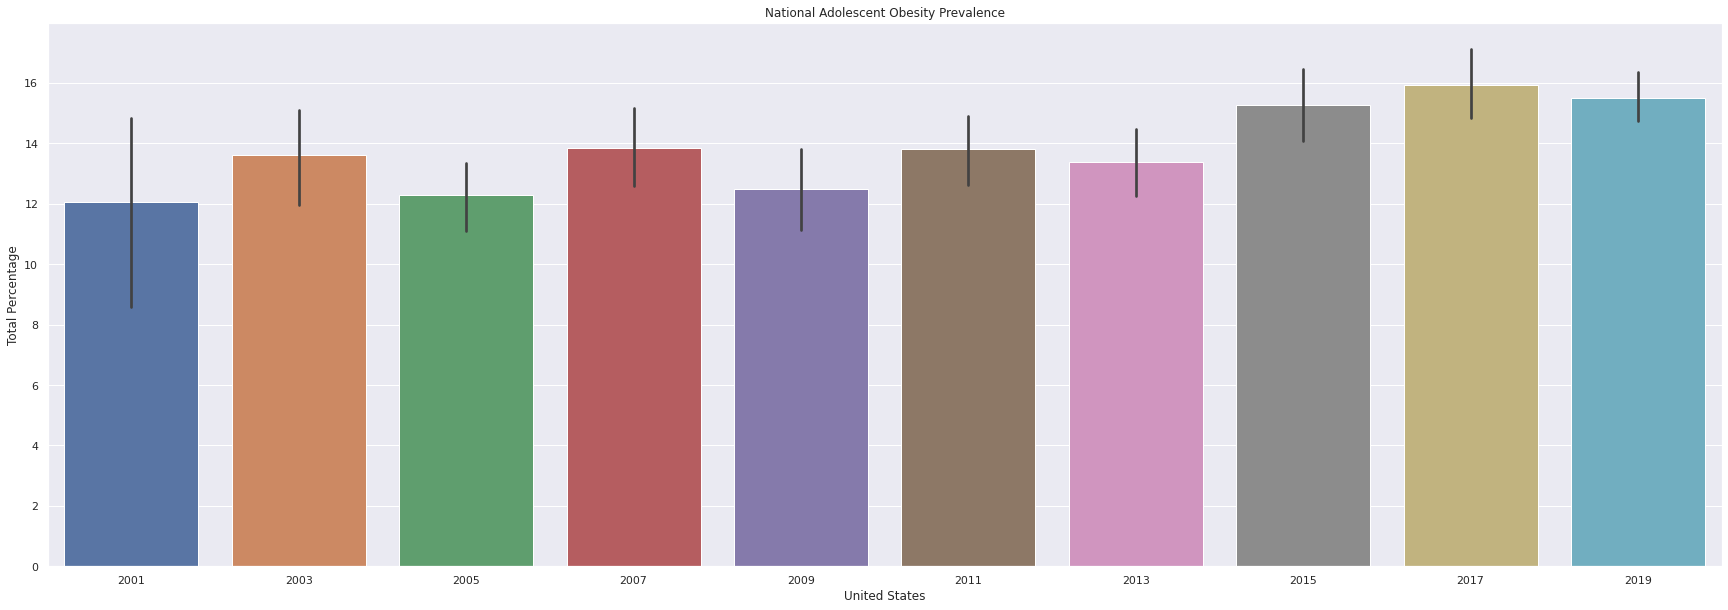

In [165]:
sns.set(rc = {'figure.figsize':(30,10)})
t = sns.barplot(data = national, x = 'yearstart', y = 'data_value')
#t.set_xticklabels(t.get_xticklabels(), rotation = 90)
t.set(xlabel = 'United States', ylabel = 'Total Percentage', title = 'National Adolescent Obesity Prevalence')

[Text(0.5, 0, 'National Adolescent Obesity Prevalence')]

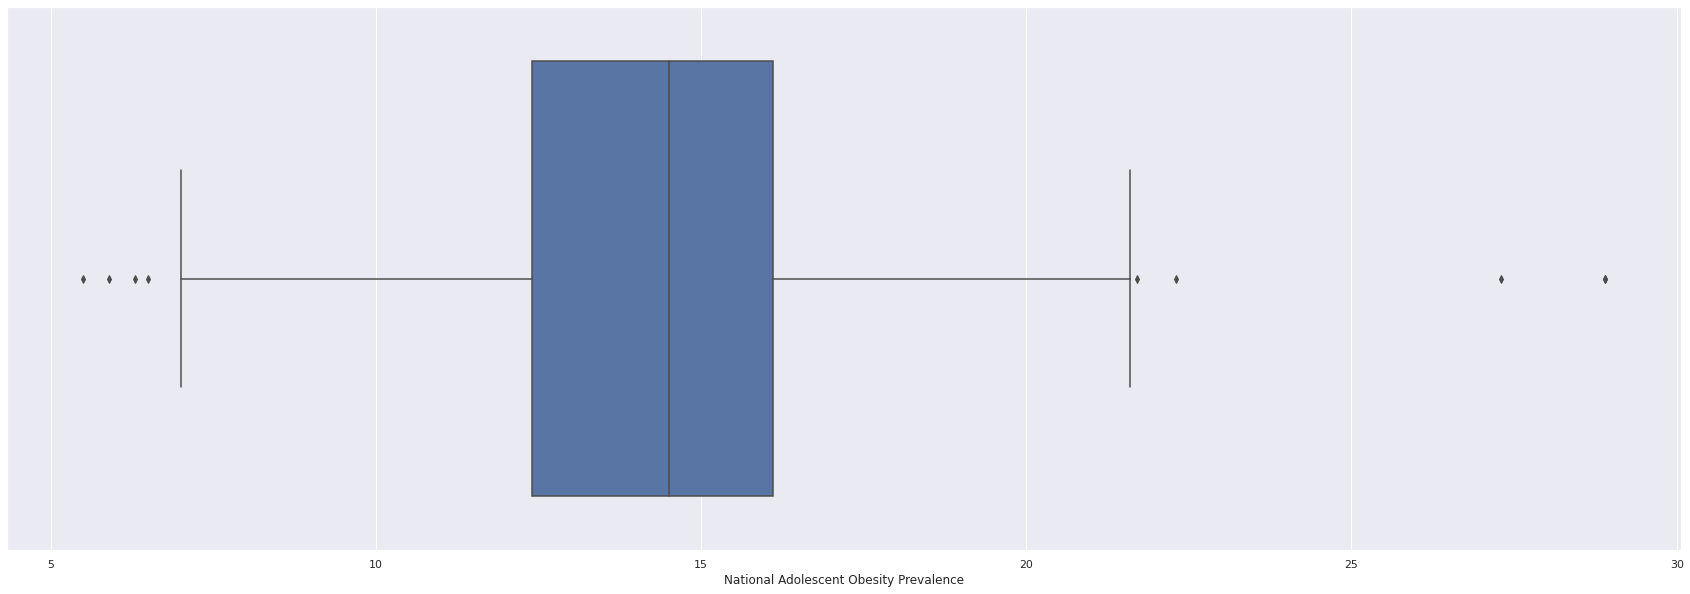

In [166]:
sns.boxplot(x=national['data_value']).set(xlabel = 'National Adolescent Obesity Prevalence')


[Text(0, 0.5, 'Total Percentage'),
 Text(0.5, 0, 'Years'),
 Text(0.5, 1.0, 'United States State Adolescent Obesity Prevalence')]

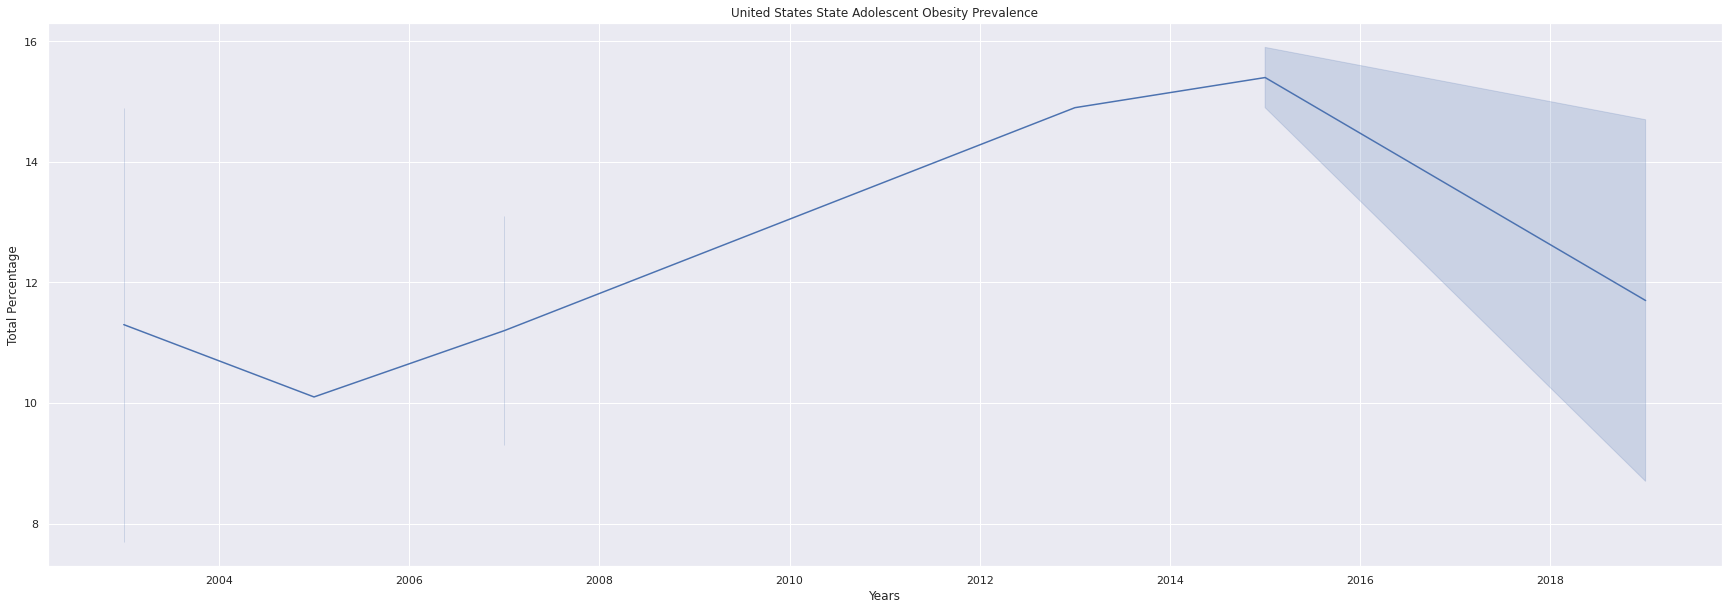

In [167]:
l_national_obesity = sns.lineplot(data = state_interest_1, x = 'yearstart', y = 'data_value')
l_national_obesity.set(xlabel = 'Years', ylabel = 'Total Percentage', title = 'United States State Adolescent Obesity Prevalence')

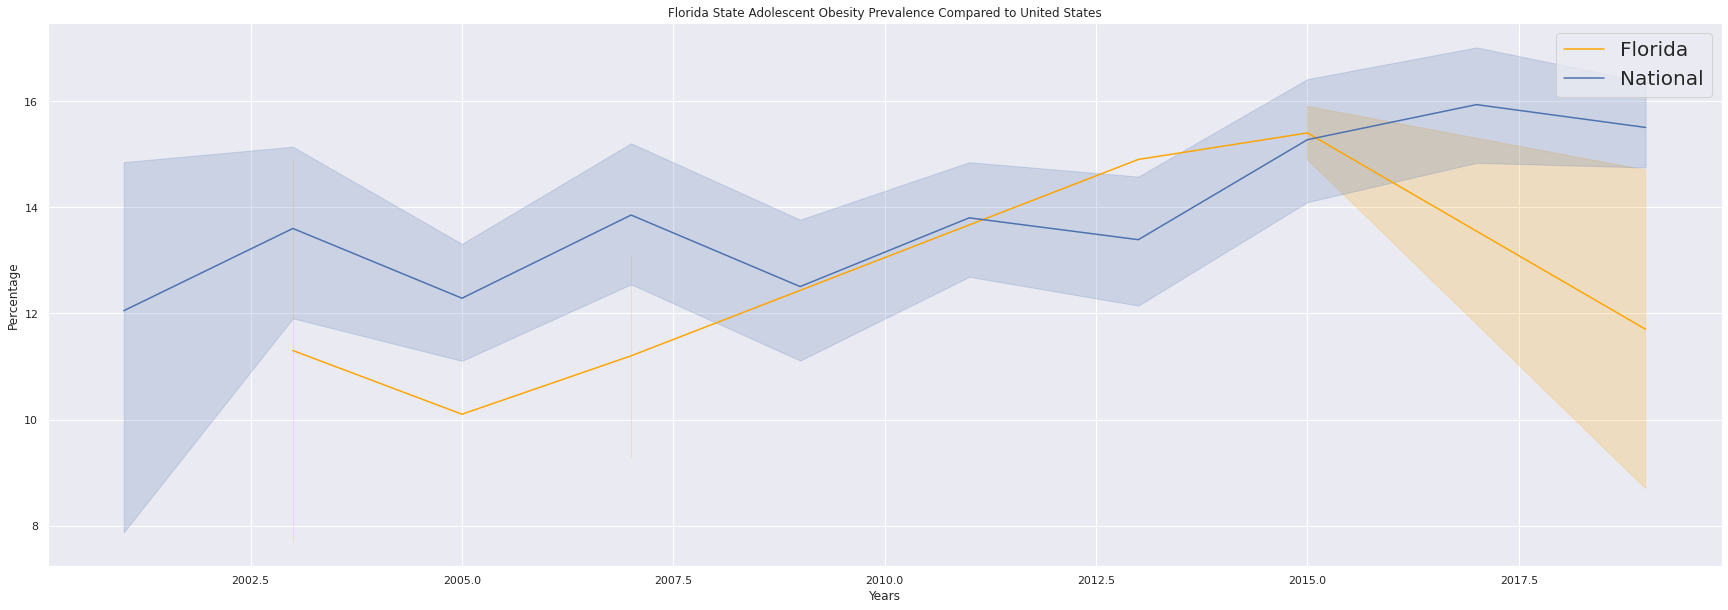

In [168]:
import matplotlib
import matplotlib.pyplot as plt

##Created combo chart to visualize the obesity rates of Florida compared to United States 
fig, ax1 = plt.subplots()
ax1.set_title('Florida State Adolescent Obesity Prevalence Compared to United States')
ax1.set_xlabel('Years')
ax1.set_ylabel('Percentage')
ax1 = sns.lineplot(x='yearstart', y='data_value', data = state_interest_1, color='orange')
#ax1.tick_params(axis='y')
#ax2.set_ylabel('National')
ax2 = sns.lineplot(x='yearstart', y='data_value', data = national)
#ax2.tick_params(axis='y')
plt.legend(labels=["Florida","National"], fontsize = 20)
plt.show()

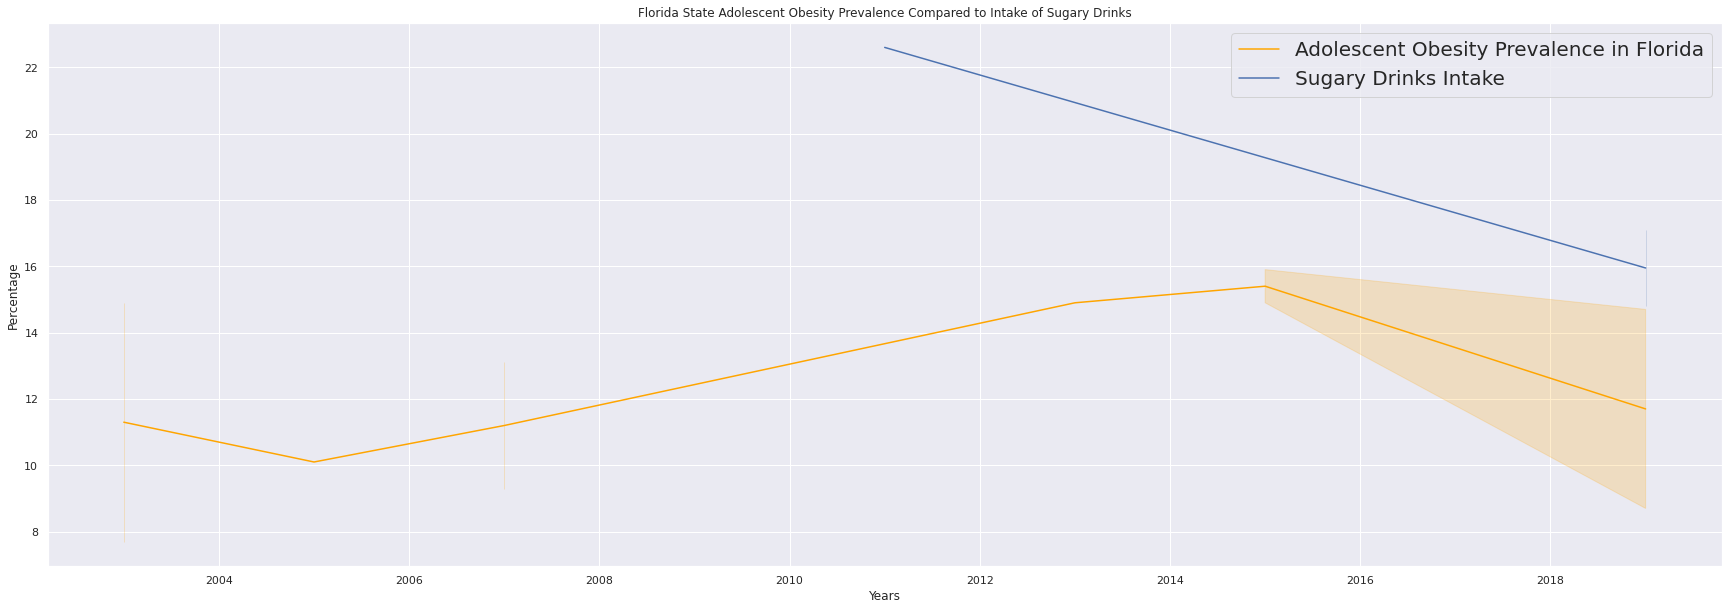

In [169]:
fig, ax1 = plt.subplots()
ax1.set_title('Florida State Adolescent Obesity Prevalence Compared to Intake of Sugary Drinks')
ax1.set_xlabel('Years')
ax1.set_ylabel('Percentage')
ax1 = sns.lineplot(x='yearstart', y='data_value', data = state_interest_1, color='orange')
#ax1.tick_params(axis='y')
#ax2.set_ylabel('National')
ax2 = sns.lineplot(x='yearstart', y='data_value', data = state_interest_2)
#ax2.tick_params(axis='y')
plt.legend(labels=["Adolescent Obesity Prevalence in Florida","Sugary Drinks Intake"], fontsize = 20)
plt.show()

In [170]:
national_sugar = df[(df['class'] == 'Sugar Drinks') & 
              (df['locationabbr'] != 'FL') &
              (df['data_value'] >= 0)]
national_sugar.sort_values('data_value')

,yearstart,yearend,locationabbr,locationdesc,datasource,class,question,data_value_type,data_value,low_confidence_limit,high_confidence_limit,sample_size,total,gender,grade,race_ethnicity,geolocation,classid,topicid,questionid,locationid,stratificationcategory1,stratification1
356,2019,2019,NY,New York,Youth Risk Behavior Surveillance System,Sugar Drinks,Percent of students in grades 9-12 who drank r...,Value,6.6,4.7,9.4,1203.0,NaN,NaN,NaN,Asian,"\n, \n(42.827001032, -75.543970427)",SD,SD1,Q058,36,Race/Ethnicity,Asian
408,2019,2019,MA,Massachusetts,Youth Risk Behavior Surveillance System,Sugar Drinks,Percent of students in grades 9-12 who drank r...,Value,9.9,6.4,14.8,420.0,NaN,NaN,11th,NaN,"\n, \n(42.27687047, -72.082690675)",SD,SD1,Q058,25,Grade,11th
499,2019,2019,CT,Connecticut,Youth Risk Behavior Surveillance System,Sugar Drinks,Percent of students in grades 9-12 who drank r...,Value,10.0,7.4,13.4,936.0,NaN,Female,NaN,NaN,"\n, \n(41.56266102, -72.649840952)",SD,SD1,Q058,9,Gender,Female
795,2017,2017,MA,Massachusetts,Youth Risk Behavior Surveillance System,Sugar Drinks,Percent of students in grades 9-12 who drank r...,Value,10.4,8.7,12.5,1480.0,NaN,NaN,NaN,Non-Hispanic White,"\n, \n(42.27687047, -72.082690675)",SD,SD1,Q058,25,Race/Ethnicity,Non-Hispanic White
76,2013,2013,NJ,New Jersey,Youth Risk Behavior Surveillance System,Sugar Drinks,Percent of students in grades 9-12 who drank r...,Value,10.5,7.2,15.1,367.0,NaN,NaN,11th,NaN,"\n, \n(40.130570048, -74.273691288)",SD,SD1,Q058,34,Grade,11th
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
790,2007,2007,MI,Michigan,Youth Risk Behavior Surveillance System,Sugar Drinks,Percent of students in grades 9-12 who drank r...,Value,36.7,23.1,52.7,175.0,NaN,NaN,NaN,American Indian/Alaska Native,"\n, \n(44.661319543001, -84.71439027)",SD,SD1,Q058,26,Race/Ethnicity,American Indian/Alaska Native
138,2007,2007,LA,Louisiana,Youth Risk Behavior Surveillance System,Sugar Drinks,Percent of students in grades 9-12 who drank r...,Value,37.3,34.3,40.4,606.0,NaN,Male,NaN,NaN,"\n, \n(31.312660644, -92.445680071)",SD,SD1,Q058,22,Gender,Male
752,2007,2007,DE,Delaware,Youth Risk Behavior Surveillance System,Sugar Drinks,Percent of students in grades 9-12 who drank r...,Value,37.9,35.0,40.9,1203.0,NaN,Male,NaN,NaN,"\n, \n(39.008830667, -75.577741168)",SD,SD1,Q058,10,Gender,Male
233,2011,2011,WV,West Virginia,Youth Risk Behavior Surveillance System,Sugar Drinks,Percent of students in grades 9-12 who drank r...,Value,42.4,36.1,49.0,576.0,NaN,NaN,10th,NaN,"\n, \n(38.665510202, -80.712640135)",SD,SD1,Q058,54,Grade,10th


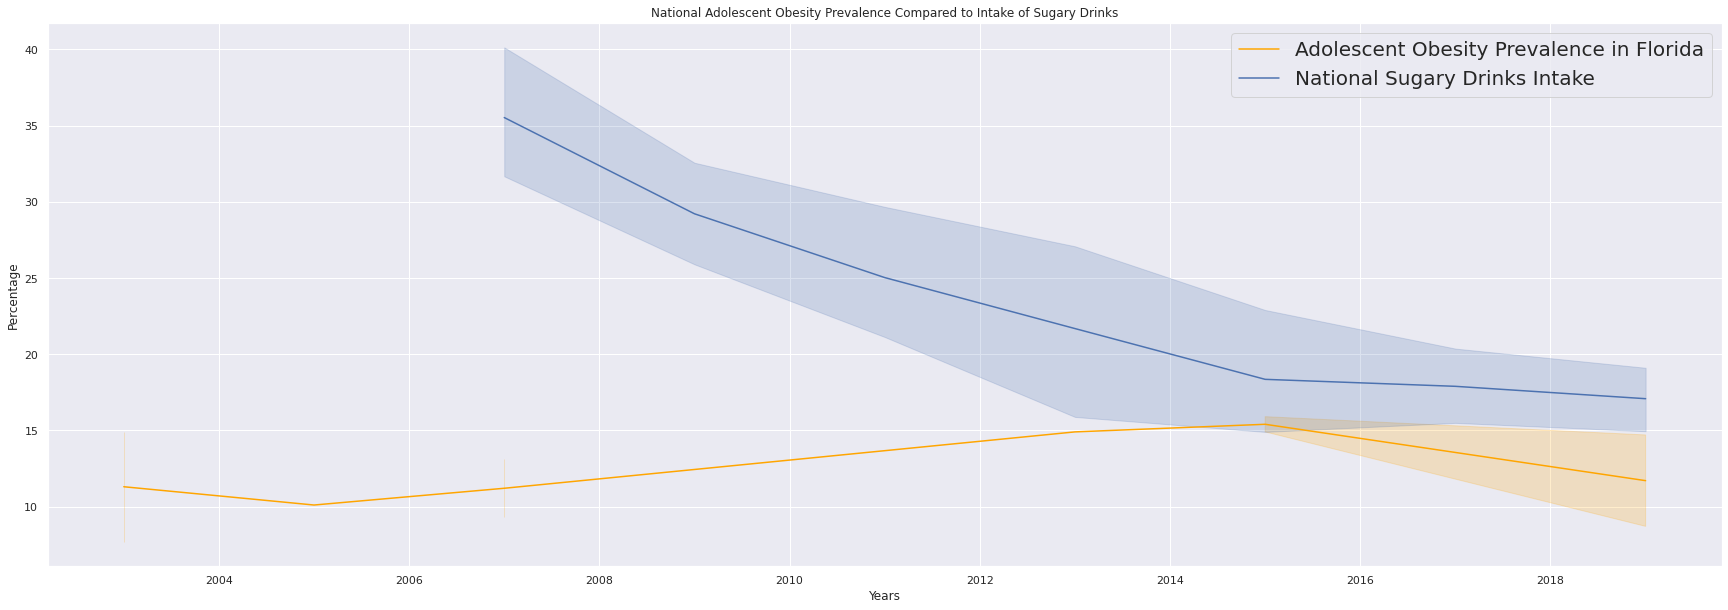

In [171]:
fig, ax1 = plt.subplots()
ax1.set_title('National Adolescent Obesity Prevalence Compared to Intake of Sugary Drinks')
ax1.set_xlabel('Years')
ax1.set_ylabel('Percentage')
ax1 = sns.lineplot(x='yearstart', y='data_value', data = state_interest_1, color='orange')
#ax1.tick_params(axis='y')
#ax2.set_ylabel('National')
ax2 = sns.lineplot(x='yearstart', y='data_value', data = national_sugar)
#ax2.tick_params(axis='y')
plt.legend(labels=["Adolescent Obesity Prevalence in Florida","National Sugary Drinks Intake"], fontsize = 20)
plt.show()

In [172]:
import plotly.express as px 
fig = px.scatter_3d(national, x = 'locationabbr', y = 'data_value', z = 'yearstart', color = 'locationabbr')
fig.show()